In [ ]:
""" ml algorithm test (sklearn)
공통 전략
- cross validation strategy
    - 10 Folds ensemble
    - classification:
        - check the label distribution
        - stratified KFold
    
    - regression:
        - KFold
        
- feature engineering
    - 균일 분포 피처 삭제 (0)
    - 상관 관계 높은 피처쌍 삭제 (0)
    - mutual information
    - feature importance (permutation_importance)
    - 피처별 스케일 비교 (x)
        - 유의미한 피처들끼리 스케일이 너무 차이나는 경우, min-max scaler 사용해 정규화
        - decision tree 사용할거라서, 의미 없음, 빼자
        
    - 낮은 "설명력" 피처 삭제: 
        - 피처별 라벨 분포 비중 확인
        - 설명력: 분산이 작아서 통계적 유의성이 존재하는 경우, 비균등 분포일수록 설명력이 높음
    
    - 파생 피처 만들기 
    
    - feature selection algorithm in sklearn:
        https://scikit-learn.org/stable/api/sklearn.feature_selection.html#
    
    - 카테고리형 피처 처리
        When the input is a DataFrame, it is also possible to pass a list of column names:
        gbdt = HistGradientBoostingClassifier(categorical_features=["site", "manufacturer"])
        
    

    
- backbone model selection:
    - DT-base model:
        - HistGradientBoostingClassifier
        - 시간 남으면, 너비가 넓은 모델 앙상블
        - DT는 분기 기반 예측이라서, 데이터 대소관계가 더 중요, 피처 스케일링이 따로 필요 없음
        - 결측치 처리는 필요함
        - reference:
            https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier
            
- hyper-parameter tuning
    optuna가 있을까??
    - hyper-parameter tuning in sklearn:
        https://scikit-learn.org/stable/modules/grid_search.html


- ensemble strategy:
    - baseline: average
    - linear regression 이용해 best-weight 적용


1) classifier
2) regressor 
3) hyper-parameter tuning


[중요]
1) 프로그래머스 라이브러리 범위
    - lightgbm, catboost, xgboost 없음
    - torch, sklearn

2) 프로그래머스 라이브러리 범위
    => 설치 불가능
    - Python 3.9의 standard library 전체 [레퍼런스]
    - pandas [레퍼런스]
    - matplotlib [레퍼런스]
    - scipy [레퍼런스]
    - seaborn [레퍼런스]
    - scikit-learn [레퍼런스]
    - numpy, numexpr, scikit-image, sympy, cython, patsy, statsmodels, cloudpickle, dill, numba, bokeh,  
      sqlalchemy, hdf5, vincent, beautifulsoup, protobuf, xlrd package 등
    

classification reference:
    https://www.kaggle.com/code/qcqced/pulsar-classification-with-3-boosting-oof

regression reference:
    https://www.kaggle.com/code/qcqced/media-cost-prediction-3-boosting-ensemble
    
"""

In [89]:
""" hyper-param module
"""


class CFG:
    """
    seed (int): value of random seed
    n_folds (int): number of folds
    cols_to_drop (List[str]): name list of dropping column in dataframe 
    """
    TRAIN_PATH = "binary_classification/creditcard_2023/creditcard_2023.csv"
    TEST_PATH = ""
    seed = 42
    n_folds = 10
    cols_to_drop = ["Class"]
    
cfg = CFG()

In [59]:
""" cross-validation strategy
"""
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
warnings.filterwarnings('ignore')


train = pd.read_csv(cfg.TRAIN_PATH)
cv = StratifiedKFold(
    n_splits=cfg.n_folds,
    shuffle=True,
    random_state=cfg.seed
)
train['fold'] = -1
for num, (tx, vx) in enumerate(cv.split(X=train, y=train['Class'])):
    train.loc[vx, 'fold'] = int(num)

train

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,fold
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0,4
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0,2
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0,2
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0,5
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1,0
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1,9
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1,7


In [60]:
""" check the cv strategy result
"""

train.fold.value_counts()

4    56863
2    56863
5    56863
1    56863
0    56863
8    56863
6    56863
7    56863
3    56863
9    56863
Name: fold, dtype: int64

In [61]:
""" feature selection strategy
1) selected by co-relation, low-variance, pearson score, mi (mutual information)
    - co-relation: df.corr() & sns.heatmap 보고, 드랍
    - low-variance: 단순히 피처값 분포에서 분산 계산해서, 낮은 분산의 피처를 삭제 (라벨 분포 비중에 대한 분산이 아님)
    - pearson score: 피처와 타겟값의 피어슨 상관계수 값 도출, 분류에서 사용 못함
    - mutual information: 이건 분류, 회귀 둘다 가능함

2) selected by feature-importance in decision tree
    - 파이프라인 완성하고, 다시 봐야할 듯
    
    - reference:
        https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance
"""
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [76]:
""" do feature selection with VarianceThreshold
"""


X = train
y = train.Class
probability = 0.5
v_threshold = probability*(1-probability) 

selector = VarianceThreshold(v_threshold)
new = selector.fit_transform(X)
new

array([[ 0.00000000e+00, -2.60647805e-01, -4.69648450e-01, ...,
        -1.51045486e-01,  1.79821000e+04,  4.00000000e+00],
       [ 1.00000000e+00,  9.85099734e-01, -3.56045093e-01, ...,
        -6.45119230e-02,  6.53137000e+03,  2.00000000e+00],
       [ 2.00000000e+00, -2.60271613e-01, -9.49384607e-01, ...,
        -2.44718229e-01,  2.51354000e+03,  2.00000000e+00],
       ...,
       [ 5.68627000e+05, -3.11997393e-01, -4.09479480e-03, ...,
        -2.68741268e-01,  2.35728500e+04,  9.00000000e+00],
       [ 5.68628000e+05,  6.36870539e-01, -5.16969517e-01, ...,
        -7.62505739e-02,  1.01608300e+04,  7.00000000e+00],
       [ 5.68629000e+05, -7.95144165e-01,  4.33236084e-01, ...,
         7.22936496e-01,  2.14939200e+04,  4.00000000e+00]])

In [80]:
""" do feature selection with mutual information
"""

mi = mutual_info_classif(
    X=X,
    y=y,
    random_state=cfg.seed,
    # n_jobs=-1
)
mi

array([0.68772305, 0.21039947, 0.28167425, 0.36632362, 0.42095861,
       0.17547888, 0.18364793, 0.30348812, 0.15409574, 0.26869216,
       0.45117345, 0.41137314, 0.4401673 , 0.02612379, 0.50968957,
       0.02743329, 0.35771861, 0.45919582, 0.22496839, 0.12398858,
       0.11778666, 0.23992162, 0.03423111, 0.06808168, 0.07806455,
       0.04084566, 0.05748883, 0.23196521, 0.17787179, 0.        ,
       0.76169032, 0.00722542])

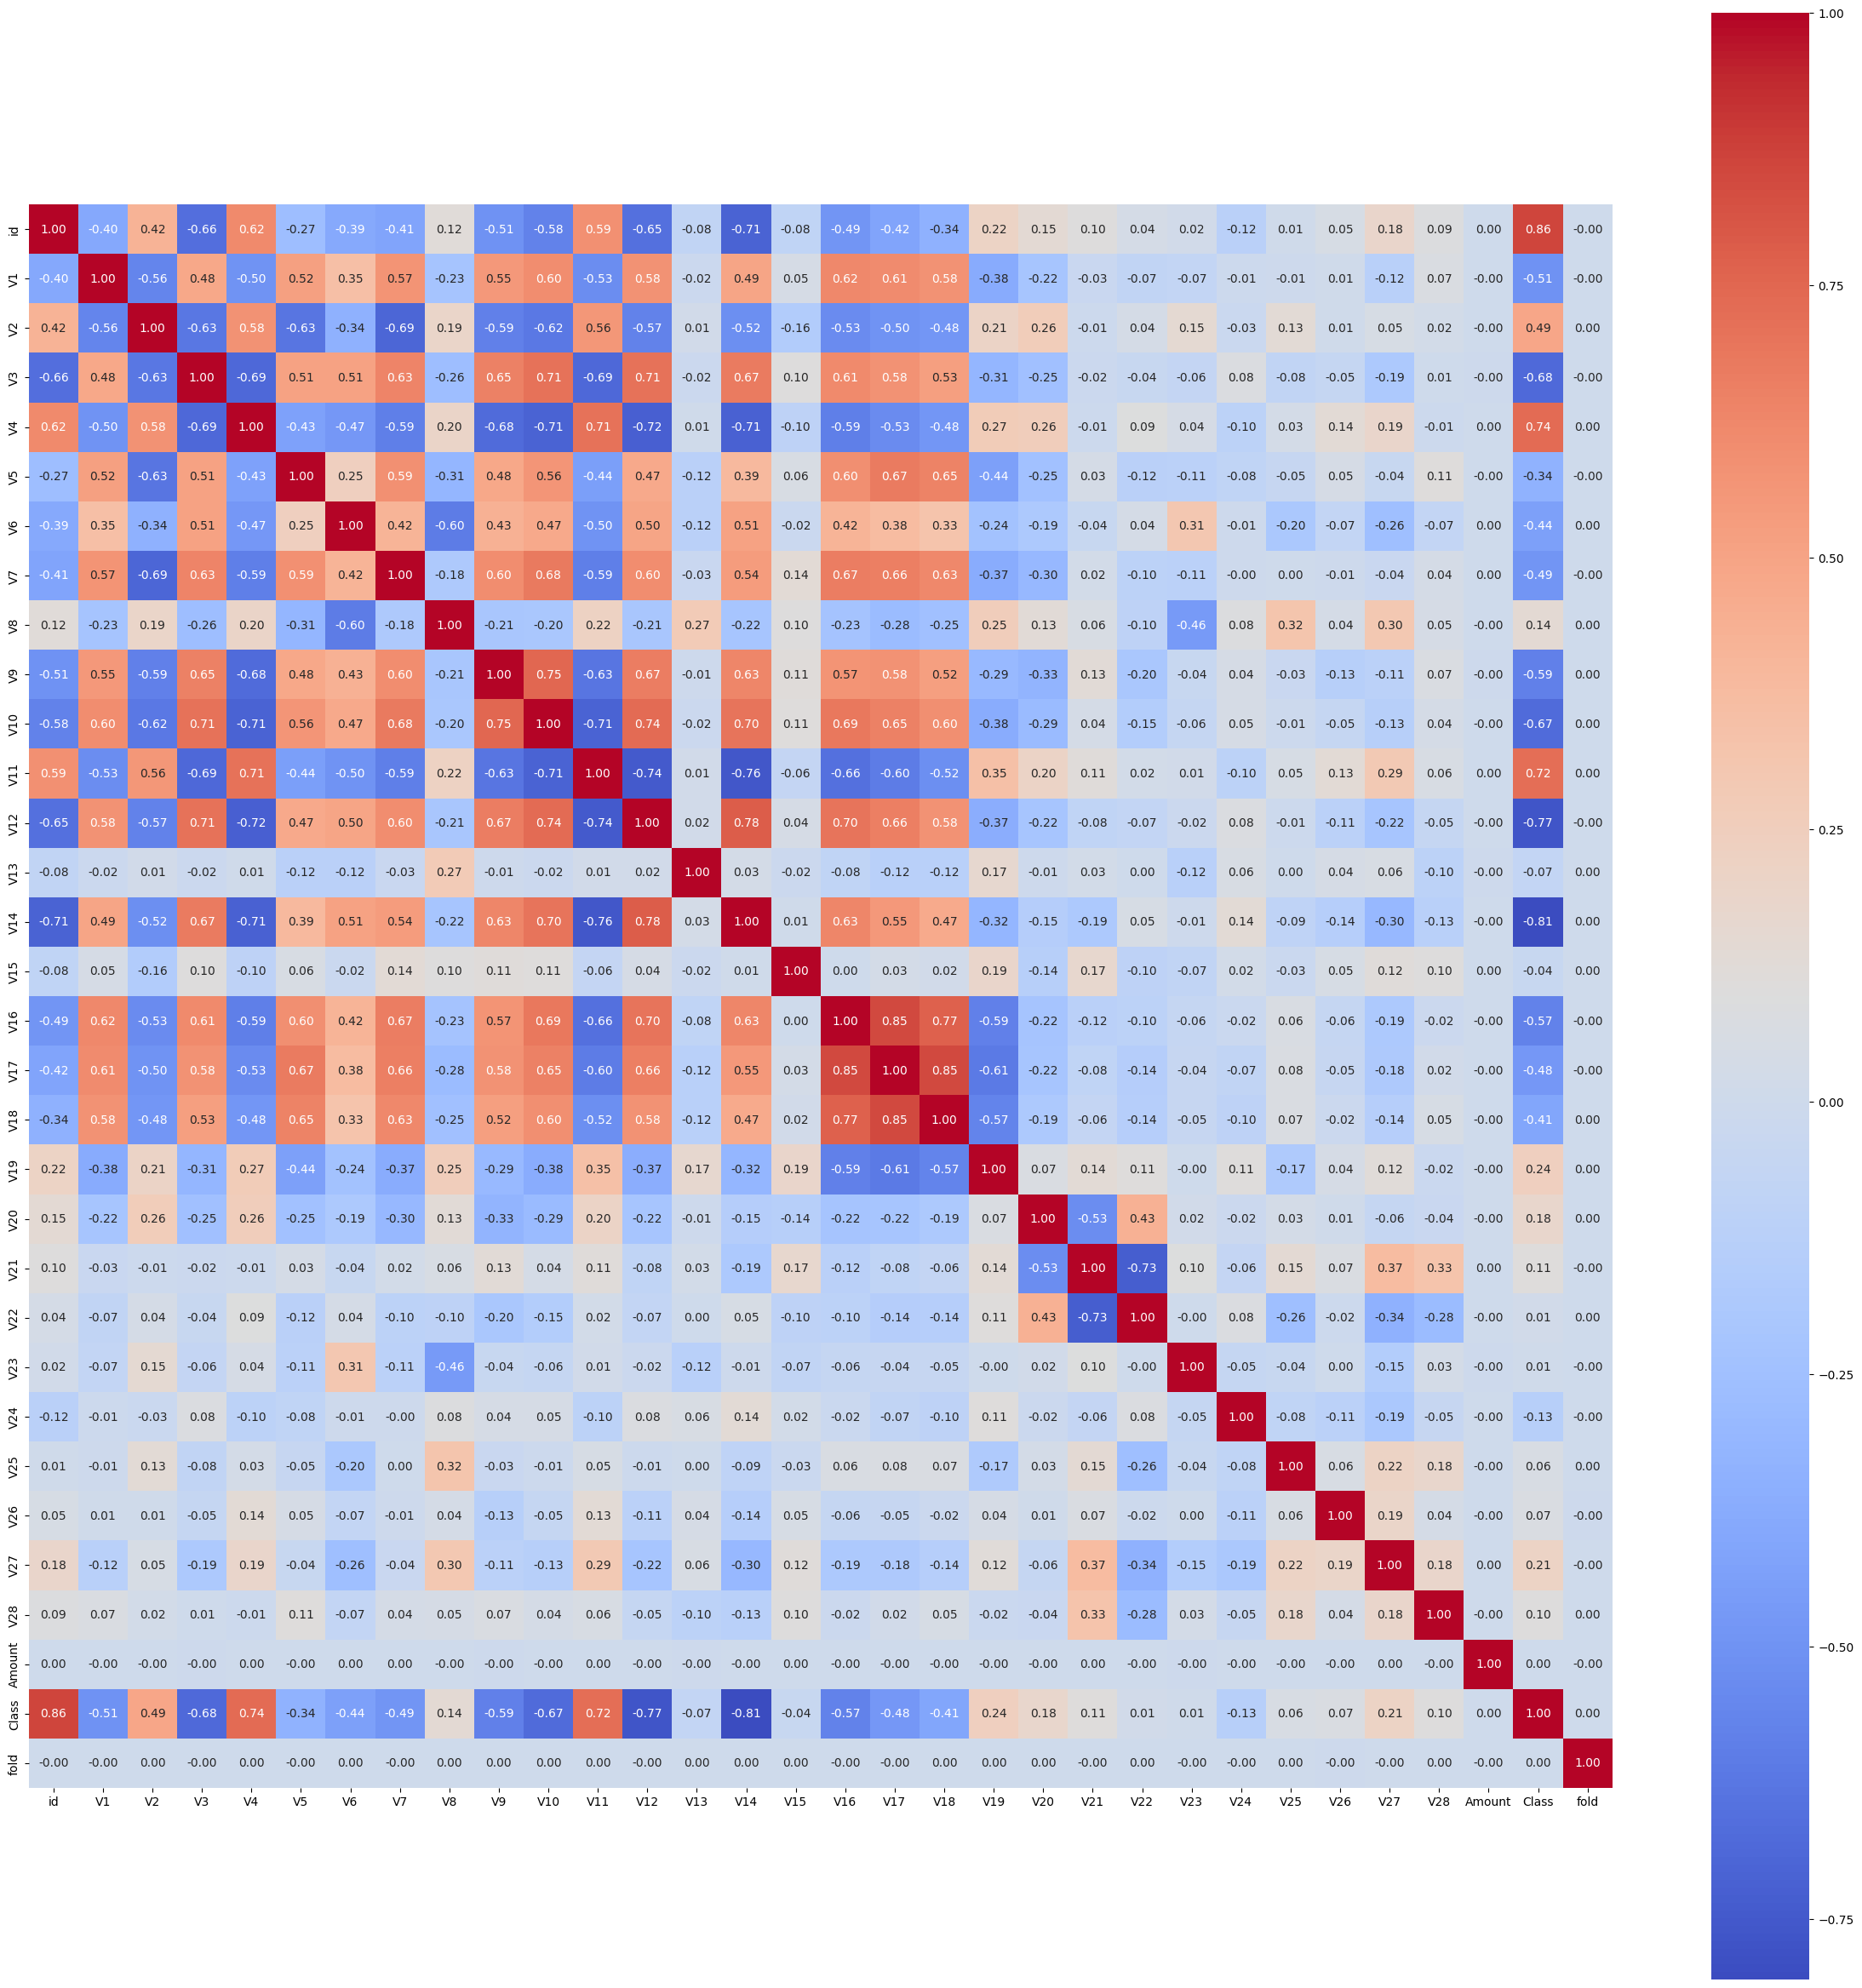

In [86]:
""" do feature selection with co-relation
"""
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30,30))
sns.heatmap(
    X.corr(),
    xticklabels=X.columns,
    yticklabels=X.columns,
    square=True,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
    
)
plt.show()

In [65]:
""" do feature selection with feature importance 
"""
from sklearn.inspection import permutation_importance
from sklearn.ensemble import HistGradientBoostingClassifier

estimator = HistGradientBoostingClassifier().fit(X, y)
result = permutation_importance(
    estimator=estimator,
    X=X,
    y=y,
    random_state=cfg.seed,
    #n_jobs=-1
)
result.importances_mean

In [100]:
""" train/validation pipeline

outer loop: folds
inner loop:
    1) split the train and validation dataset for current fold
    2) initialize the model object 
"""
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score


param_dict = {
    'loss': 'log_loss',
    'learning_rate': 1e-4,
    'max_iter': 100,
    'max_leaf_nodes': 63,
    'max_depth': 10,
    'l2_regularization': 1e-2,
    'random_state': cfg.seed,
    'class_weight': 'balanced',
    'early_stopping': True
    
}

oof = []
metric_fn = {
    'f1': f1_score,
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
}
cv_metric = {
    'f1': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
} 

for fold in range(cfg.n_folds):
    train_df = X[X['fold'] != fold]
    train_X, train_Y = train_df.drop(columns=cfg.cols_to_drop), train_df.Class
    
    valid_df = X[X['fold'] == fold]
    valid_X, valid_Y = valid_df.drop(columns=cfg.cols_to_drop), valid_df.Class
    
    clf = HistGradientBoostingClassifier(**param_dict).fit(
        train_X,
        train_Y
    )
    valid_pred = clf.predict(valid_X)
    for k, metric in metric_fn.items():
        cv_metric[k].append(metric(valid_Y, valid_pred))
    
    oof.append(clf)    

for k,v in cv_metric.items():
    print(f"final oof {k} is: {sum(v)/cfg.n_folds}")

final oof f1 is: 0.9995672933349017
final oof accuracy is: 0.9995673812496703
final oof precision is: 0.9997642584466616
final oof recall is: 0.999370418532665


In [127]:
""" prediction loop
1) classification: use predict_proba()
2) regression: use predict()
"""

oof_pred = []
for oof_model in oof:
    valid_pred = oof_model.predict(valid_X)
    oof_pred.append(oof_model.predict_proba(valid_X))
    
pred = np.mean(oof_pred, axis=0).argmax(axis=-1)
pred

array([0, 0, 0, ..., 1, 1, 1])